In [6]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from math import sqrt
import scipy.stats as ss
import scipy.optimize as opt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [7]:
start_date = datetime(2017,1,1)
end_date = datetime(2023,6,30)

TSLA = yf.download('TSLA', start_date, end_date)
TSLA.reset_index(inplace = True)

RACE = yf.download('RACE', start_date, end_date)
RACE.reset_index(inplace = True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
TSLA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1628,2023-06-23,259.290009,262.450012,252.800003,256.600006,256.600006,176584100
1629,2023-06-26,250.070007,258.369995,240.699997,241.050003,241.050003,179990600
1630,2023-06-27,243.240005,250.389999,240.850006,250.210007,250.210007,164968200
1631,2023-06-28,249.699997,259.880005,248.889999,256.239990,256.239990,159770800
1632,2023-06-29,258.029999,260.739990,253.610001,257.500000,257.500000,131283400


In [9]:
RACE.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1633,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03
mean,2020-03-31 06:20:03.674219264,169.574435,171.025092,168.139683,169.580245,166.189510,4.349696e+05
min,2017-01-03 00:00:00,57.770000,58.500000,57.560001,58.279999,55.351601,5.380000e+04
25%,2018-08-16 00:00:00,124.199997,126.070000,123.449997,124.720001,120.034538,2.506000e+05
50%,2020-04-01 00:00:00,168.029999,168.970001,166.740005,168.020004,163.667664,3.486000e+05
75%,2021-11-11 00:00:00,210.949997,212.449997,209.339996,210.660004,208.056396,5.120000e+05
max,2023-06-29 00:00:00,318.359985,322.720001,318.250000,320.670013,320.670013,6.443500e+06
std,NaN,55.627461,56.013133,55.222290,55.610245,56.327048,3.501259e+05


In [10]:
TSLA['Typical_Price'] = TSLA[['High', 'Low', 'Close']].mean(axis = 1)
TSLA['lRETS'] = (np.log(TSLA.Close) - np.log(TSLA.Close.shift(1))) * 100.
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lRETS
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,14.406222,NaN
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,14.873333,4.505472
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,15.026222,-0.105786
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,15.217111,0.991755
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,15.360000,0.986346


In [11]:
RACE['Typical_Price'] = RACE[['High', 'Low', 'Close']].mean(axis = 1)
RACE['lRETS'] = (np.log(RACE.Close) - np.log(RACE.Close.shift(1))) * 100.
RACE.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lRETS
0,2017-01-03,59.160000,59.259998,58.349998,58.939999,55.978439,546700,58.849998,NaN
1,2017-01-04,58.840000,59.480000,58.790001,59.410000,56.424824,373000,59.226667,0.794261
2,2017-01-05,59.439999,59.880001,59.341000,59.360001,56.377338,304800,59.527000,-0.084195
3,2017-01-06,58.970001,59.160000,58.810001,58.939999,55.978439,280500,58.970000,-0.710066
4,2017-01-09,57.770000,58.500000,57.560001,58.279999,55.351601,409300,58.113333,-1.126099


C:\Users\aksha\AppData\Local\Temp\ipykernel_11004\182698112.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TSLA['lRETS'].dropna(), ax = axes[0])
C:\Users\aksha\AppData\Local\Temp\ipykernel_11004\182698112.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RACE['lRETS'].dropna(), ax = axes[

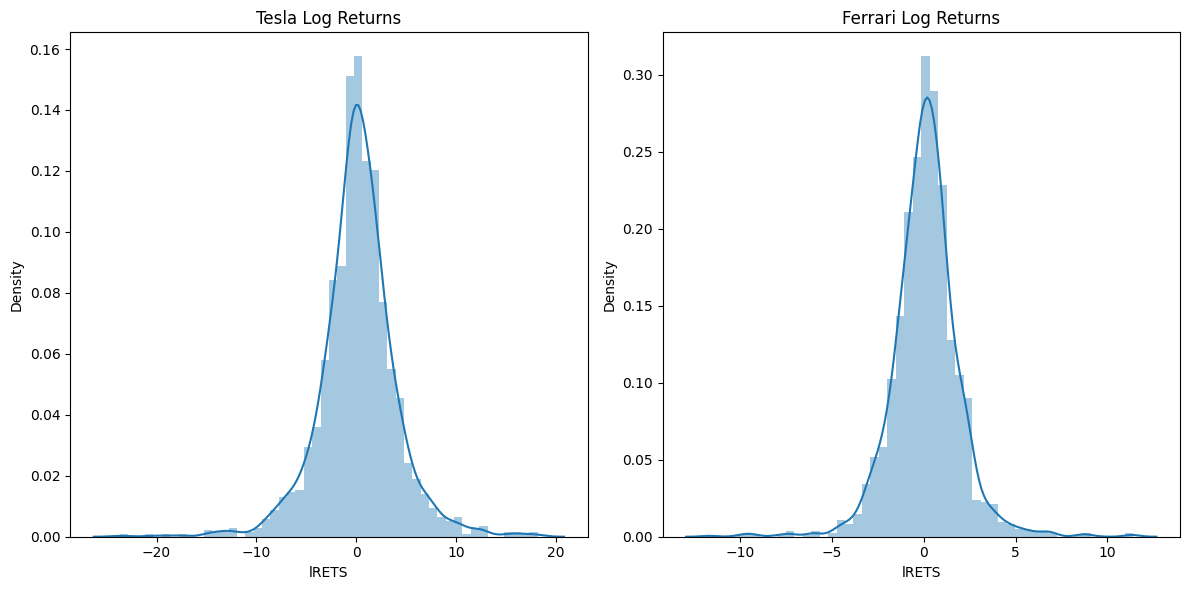

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.distplot(TSLA['lRETS'].dropna(), ax = axes[0])
axes[0].set_title('Tesla Log Returns')

sns.distplot(RACE['lRETS'].dropna(), ax = axes[1])
axes[1].set_title('Ferrari Log Returns')
plt.tight_layout()
plt.show()

Defining the GARCH Model and Likelihood Function:

In [31]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T)
    sigma2 = np.zeros(T)
    F = np.zeros(T)
    v = np.zeros(T)
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])
        Likelihood = np.sum(GARCH_Dens[1:-1])
    return Likelihood

In [32]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    return Y

In [35]:
Y = TSLA['lRETS'].dropna()
T = len(Y)

param0 = np.array([0.1, 0.6, 0.15, 0.5])
param_star = opt.minimize(GARCH, param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH = GARCH_Prod(param_star.x, Y[1], T)
timevec = np.linspace(1, T, T)

import plotly.graph_objects as go

def plot_garch(timevec, actual, predicted, title='GARCH Model'):

  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=timevec,  
      y=actual,
      mode='lines',
      name='Actual'
  ))

  fig.add_trace(go.Scatter(
      x=timevec, 
      y=predicted,
      mode='lines',
      name='Predicted'
  ))

  fig.update_layout(
      title=title,
      xaxis_title='Time',
      yaxis_title='Value'
  )

  return fig


fig = plot_garch(timevec, Y, Y_GARCH, 'GARCH for TSLA')
fig.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_11004\2908590491.py:5: OptimizeWarning:

Unknown solver options: xtol



         Current function value: 0.582212
         Iterations: 2
         Function evaluations: 126
         Gradient evaluations: 22


<Figure size 1400x600 with 0 Axes>

In [36]:
GARCH_TSLA = pd.DataFrame({'Actual':list(Y), 'Predicted':list(Y_GARCH)})
GARCH_TSLA

,Actual,Predicted
0,4.505472,4.505472
1,-0.105786,0.527168
2,0.991755,0.920752
3,0.986346,0.968359
4,-0.611516,1.744435
...,...,...
1627,-3.073851,-0.926101
1628,-6.251408,-1.455953
1629,3.729620,1.712272
1630,2.381388,2.373567


In [37]:
RMS_TSLA = sqrt(mean_squared_error(GARCH_TSLA['Actual'], GARCH_TSLA['Predicted']))
RMS_TSLA

4.028515749815146

In [40]:
Y = RACE['lRETS'].dropna()
T = len(Y)

param0 = np.array([0.18, 0.27, 0.15, 0.4])
param_star = opt.minimize(GARCH, param0, method = 'BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH = GARCH_Prod(param_star.x,Y[1],T)
timevec = np.linspace(1,T,T)

'''fig = plt.figure(figsize = (14,6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')

plt.legend(loc = 'upper right')
plt.title("GARCH Model for RACE")
plt.show()'''


import plotly.graph_objects as go

def plot_garch(timevec, actual, predicted, title='GARCH Model'):

  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=timevec,  
      y=actual,
      mode='lines',
      name='Actual'
  ))

  fig.add_trace(go.Scatter(
      x=timevec, 
      y=predicted,
      mode='lines',
      name='Predicted'
  ))

  fig.update_layout(
      title=title,
      xaxis_title='Time',
      yaxis_title='Value'
  )

  return fig


fig = plot_garch(timevec, Y, Y_GARCH, 'GARCH for TSLA')
fig.show()

         Current function value: -0.126201
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 21


C:\Users\aksha\AppData\Local\Temp\ipykernel_11004\4163870378.py:5: OptimizeWarning:

Unknown solver options: xtol



In [41]:
GARCH_RACE = pd.DataFrame({'Actual':list(Y), 'Predicted':list(Y_GARCH)})
GARCH_RACE

,Actual,Predicted
0,0.794261,0.794261
1,-0.084195,0.984985
2,-0.710066,0.048799
3,-1.126099,-0.330870
4,1.193944,-0.422582
...,...,...
1627,0.074814,-0.767788
1628,-0.335499,-0.759760
1629,2.449446,0.691003
1630,1.224600,1.773252


In [42]:
RMS_RACE = sqrt(mean_squared_error(GARCH_RACE['Actual'], GARCH_RACE['Predicted']))
RMS_RACE

2.0117940875542013

In [43]:
y_pred = [] * 1000

for i in range(len(GARCH_TSLA)+1):
    if i == 0:
        y_pred.append(math.exp(GARCH_TSLA['Predicted'][i]/100) * TSLA['Close'][i])
    else:
        y_pred.append(math.exp(GARCH_TSLA['Predicted'][i-1]/100) * TSLA['Close'][i-1])

In [44]:
TSLA_Pred = pd.DataFrame({'Actual_Close_Price': TSLA['Close'], 'Predicted_Close_Price': list(y_pred), 'Date': TSLA.index})
TSLA_Pred.set_index('Date', inplace = True)

In [45]:
TSLA_Pred

,Actual_Close_Price,Predicted_Close_Price
Date,,
0,14.466000,15.132667
1,15.132667,15.132667
2,15.116667,15.212652
3,15.267333,15.256497
4,15.418667,15.415894
...,...,...
1628,256.600006,262.170743
1629,241.050003,252.891095
1630,250.210007,245.212975


In [64]:
'''TSLA_Pred[['Actual_Close_Price', 'Predicted_Close_Price']].loc[:].plot(figsize = (15, 6), style = ['-', '--'], title = 'Actual vs Predicted')
fig = plt.figure(figsize = (15, 6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')
plt.legend(loc = 'upper right')
plt.title("GARCH Model")
plt.show() 
'''
import plotly.graph_objects as go

# Actual and predicted data
actual = TSLA_Pred['Actual_Close_Price'] 
predicted = TSLA_Pred['Predicted_Close_Price']

# Create figure
fig = go.Figure()

# Add actual trace
fig.add_trace(go.Scatter(
    x=actual.index,
    y=actual,
    mode='lines',
    name='Actual'
)) 

# Add predicted trace  
fig.add_trace(go.Scatter(
    x=predicted.index,
    y=predicted,  
    mode='lines',
    name='Predicted'
))

# Set title
fig.update_layout(
    title='Actual vs Predicted',
    xaxis_title='Date',
    yaxis_title='Price'
)

# Show figure
fig.show()



# Create figure
fig_G = go.Figure()

# Add actual trace
fig_G.add_trace(go.Scatter(
  x=timevec,
  y=Y,
  mode='lines',
  name='Actual'
))

# Add predicted trace
fig_G.add_trace(go.Scatter(
  x=timevec,
  y=Y_GARCH,
  mode='lines', 
  name='Predicted'
))

# Update layout
fig_G.update_layout(
  title='GARCH Model',
  xaxis_title='Time',
  yaxis_title='Value'  
)

# Show figure
fig_G.show() 

Trading Strategy



In [48]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(TSLA_Pred)-1):
    if TSLA_Pred['Predicted_Close_Price'][i+1] > TSLA_Pred['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / TSLA_Pred['Actual_Close_Price'][i])
            balance = int(amount % TSLA_Pred['Actual_Close_Price'][i])
            portfolio = stocks * TSLA_Pred['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:', TSLA_Pred['Actual_Close_Price'][i] , 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * TSLA_Pred['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:', TSLA_Pred['Actual_Close_Price'][i], 'Action:',action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)

    elif TSLA_Pred['Predicted_Close_Price'][i+1] < TSLA_Pred['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * TSLA_Pred['Actual_Close_Price'][i]
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:', TSLA_Pred['Actual_Close_Price'][i], 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',TSLA_Pred['Actual_Close_Price'][i], 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)

    print('\n')

Stock: 14.465999603271484 Action: Buy Portfolio: 9996.01 Stocks: 691 Balance_init: 3 Total($) 9999.01


Stock: 15.13266658782959 Action: Bought--Holding Portfolio: 10456.67 Stocks: 691 Balance_init: 3 Total($) 10459.67


Stock: 15.116666793823242 Action: Bought--Holding Portfolio: 10445.62 Stocks: 691 Balance_init: 3 Total($) 10448.62


Stock: 15.267333030700684 Action: Bought--Holding Portfolio: 10549.73 Stocks: 691 Balance_init: 3 Total($) 10552.73


Stock: 15.41866683959961 Action: Bought--Holding Portfolio: 10654.3 Stocks: 691 Balance_init: 3 Total($) 10657.3


Stock: 15.324666976928711 Action: Bought--Holding Portfolio: 10589.34 Stocks: 691 Balance_init: 3 Total($) 10592.34


Stock: 15.315333366394043 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10585.9


Stock: 15.305999755859375 Action: Buy Portfolio: 10576.45 Stocks: 691 Balance_init: 9 Total($) 10585.45


Stock: 15.850000381469727 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10961.35


Stock: 15

In [58]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price': TSLA['Close'][1:],
                               'Predicted_Close_Price': list(y_pred[1:]),
                               'Date': TSLA['Date'][1:],
                               'Action': action,
                               'Amount($)':Amount,
                               'Portfolio($)': Portfolio,
                               'Stocks': Stocks})

Strategy_Result.tail()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Amount($),Portfolio($),Stocks
1628,256.600006,262.170743,2023-06-23,Price-Prediction-Already-Lower,120785.0,0.00000,0
1629,241.050003,252.891095,2023-06-26,Price-Prediction-Already-Lower,120785.0,0.00000,0
1630,250.210007,245.212975,2023-06-27,Buy,120784.0,120766.05153,501
1631,256.239990,256.219952,2023-06-28,Bought--Holding,125373.0,125355.21336,501
1632,257.500000,255.618084,2023-06-29,Sell,128394.0,0.00000,0


In [60]:
#Strategy_Result[['Actual_Close_Price', 'Predicted_Close_Price']].loc[:].plot(figsize = (15, 6), style = ['-', '--'], title = 'Actual vs Predicted')
#Strategy_Result[['Amount($)']].iloc[0:].plot(figsize = (15, 4), style = ['-g'], title = 'Total Amount')


import plotly.graph_objects as go

# Actual and predicted data
actual = Strategy_Result['Actual_Close_Price'] 
predicted = Strategy_Result['Predicted_Close_Price']
amount= Strategy_Result['Amount($)']
date=Strategy_Result['Date']

# Create figure
fig = go.Figure()

# Add actual trace
fig.add_trace(go.Scatter(
    x=date,
    y=actual,
    mode='lines',
    name='Actual'
)) 

# Add predicted trace  
fig.add_trace(go.Scatter(
    x=date,
    y=predicted,  
    mode='lines',
    name='Predicted'
))

# Set title
fig.update_layout(
    title='Actual vs Predicted',
    xaxis_title='Date',
    yaxis_title='Price'
)

# Show figure
fig.show()

figt=go.Figure()

figt.add_trace(go.Scatter(
    x=date,
    y=amount,
    mode='lines',
    name='Actual'
))

# Set title
figt.update_layout(
    title='Total Amount',
    xaxis_title='Date',
    yaxis_title='Price'
)

figt.show()

In [61]:
Profit = (Amount[-1] / 10000) - 1  # Assuming Amount[-1] represents the final amount
Profit_percent = Profit * 100

print('Initial Investment: $10,000')
print('Final Amount:', Amount[-1], '$')
print('Profit Percentage:', Profit_percent, '%')

Initial Investment: $10,000
Final Amount: 128394.0 $
Profit Percentage: 1183.94 %
